Running Simulation...
Noise: 0.00 ==> Acc: 100.00%
Noise: 0.05 ==> Acc: 94.80%
Noise: 0.10 ==> Acc: 90.40%
Noise: 0.15 ==> Acc: 86.80%
Noise: 0.20 ==> Acc: 81.20%
Noise: 0.25 ==> Acc: 73.60%
Noise: 0.30 ==> Acc: 64.40%
Noise: 0.35 ==> Acc: 63.20%
Noise: 0.40 ==> Acc: 56.80%
Noise: 0.45 ==> Acc: 59.60%
Noise: 0.50 ==> Acc: 47.60%
Noise: 0.55 ==> Acc: 48.80%
Noise: 0.60 ==> Acc: 37.20%
Noise: 0.65 ==> Acc: 36.80%
Noise: 0.70 ==> Acc: 36.00%
Noise: 0.75 ==> Acc: 26.80%
Noise: 0.80 ==> Acc: 22.40%
Noise: 0.85 ==> Acc: 14.40%
Noise: 0.90 ==> Acc: 10.00%
Noise: 0.95 ==> Acc: 6.40%
Noise: 1.00 ==> Acc: 0.00%


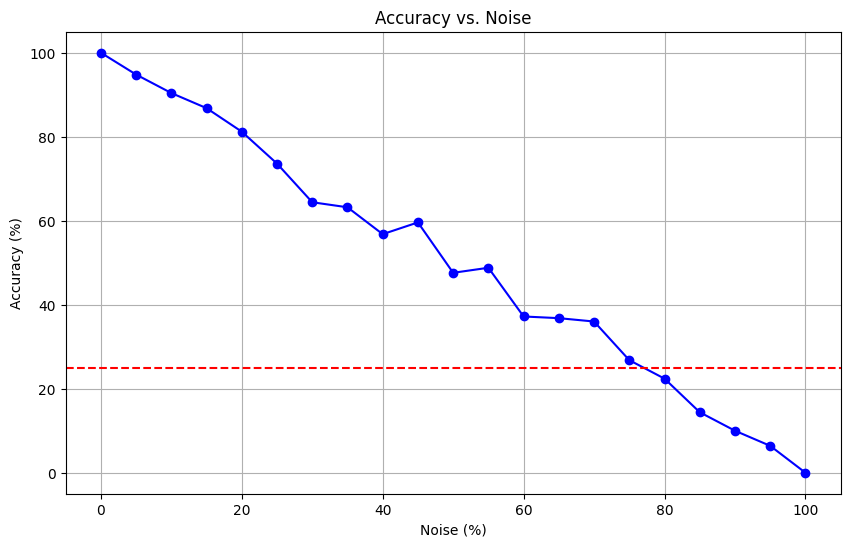

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
import random

def superdense(bitpair, noise=0.0):
    q = QuantumRegister(2, 'q')
    c = ClassicalRegister(2, 'c')
    qc = QuantumCircuit(q, c)
    qc.h(0)
    qc.cx(0, 1)
    if bitpair == '11':
        qc.z(0)
        qc.x(0)
    elif bitpair == '10':
        qc.z(0)
    elif bitpair == '01':
        qc.x(0)
    if noise > 0 and random.random() < noise:
        qc.x(0)
    qc.cx(0, 1)
    qc.h(0)
    qc.measure(q, c)
    return qc

def calc_acc(noise, trials=100):
    sim = AerSimulator()
    correct = 0
    pkts = ['00', '01', '10', '11']
    circs = []
    targs = []
    for _ in range(trials):
        p = random.choice(pkts)
        targs.append(p)
        circs.append(superdense(p, noise))
    job = sim.run(transpile(circs, sim), shots=1, memory=True)
    res = job.result()
    for i in range(trials):
        rec = res.get_memory(i)[0][::-1]
        if rec == targs[i]:
            correct += 1
    return (correct / trials) * 100

if __name__ == "__main__":
    print("Running Simulation...")
    x_noise = np.linspace(0, 1, 21)
    y_acc = []
    for n in x_noise:
        acc = calc_acc(n, 250)
        y_acc.append(acc)
        print(f"Noise: {n:.2f} ==> Accuracyw: {acc:.2f}%")

    plt.figure(figsize=(10, 6))
    plt.plot(x_noise * 100, y_acc, marker='o', color='b')
    plt.axhline(y=25, color='r', linestyle='--')
    plt.title('Accuracy vs. Noise')
    plt.xlabel('Noise (%)')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)
    plt.show()